Orignally from Kaggle https://www.kaggle.com/code/anriueno/python-titanic-data-exploratory 

**With modifications to fit the needs of the class.**

**Python | Titanic Data Exploratory**

In [ ]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
df = pd.read_csv('sample_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

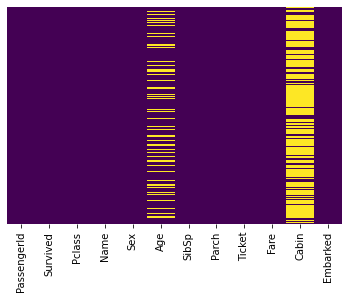

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
    
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

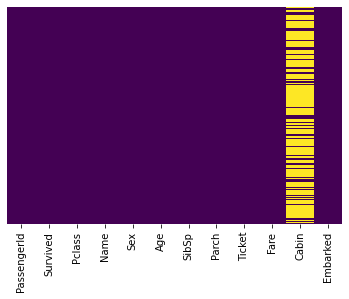

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
#transform categorical features to dummy variables

sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [ ]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
train = pd.concat([df,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Logistic Regression Classification

In [ ]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(max_iter=100000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[134,  20],
       [ 38,  76]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)*100
print('Accuracy of Logistic Regression model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Logistic Regression model is equal 78.36 %.


### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.68      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
confusion_matrix(y_test,y_pred)

array([[132,  22],
       [ 37,  77]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of decision tree model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model is equal 77.99 %.


### Support Vector Machine Classification

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

linear_svc=SVC(kernel='linear') 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=linear_svc.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[132,  22],
       [ 37,  77]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Linear SVM model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Linear SVM model is equal 76.49 %.


In [ ]:
svm=SVC(kernel='poly',degree=2) 

# fit classifier to training set
svm.fit(X_train,y_train)

# make predictions on test set
y_pred=svm.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[148,   6],
       [ 93,  21]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Linear SVM model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Linear SVM model is equal 63.06 %.


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[129,  25],
       [ 38,  76]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Naive Bayes Classifier model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Naive Bayes Classifier model is equal 76.49 %.


### Ensemble - RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=200, random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[134,  20],
       [ 32,  82]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of RandomForestClassifier model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of RandomForestClassifier model is equal 80.6 %.


### Ensemble - AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adboost = AdaBoostClassifier()
adboost.fit(X_train,y_train)
y_pred=adboost.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[132,  22],
       [ 42,  72]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of AdaBoostClassifier model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of AdaBoostClassifier model is equal 76.12 %.


### Ensemble - GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gdboost = GradientBoostingClassifier()
gdboost.fit(X_train,y_train)
y_pred=gdboost.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[143,  11],
       [ 30,  84]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of GradientBoostingClassifier model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of GradientBoostingClassifier model is equal 84.7 %.


### Ensemble - Vote

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vote = VotingClassifier(estimators=[('a', logmodel), ('b', NB), ('c', tree),('d', forest), ('e', adboost), ('f', gdboost)], voting='hard',weights=[1,1,1,1,1,3])

In [ ]:
vote.fit(X_train,y_train)
y_pred=vote.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[141,  13],
       [ 32,  82]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Emsemble Voting model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Emsemble Voting model is equal 83.21 %.


In [ ]:
vote.estimators_

[LogisticRegression(max_iter=100000),
 GaussianNB(),
 DecisionTreeClassifier(),
 RandomForestClassifier(n_estimators=200, random_state=0),
 AdaBoostClassifier(),
 GradientBoostingClassifier()]

In [ ]:
vote.voting

'hard'

In [ ]:
vote.weights

[1, 1, 1, 1, 1, 3]

In [ ]:
vote.named_estimators_

{'a': LogisticRegression(max_iter=100000),
 'b': GaussianNB(),
 'c': DecisionTreeClassifier(),
 'd': RandomForestClassifier(n_estimators=200, random_state=0),
 'e': AdaBoostClassifier(),
 'f': GradientBoostingClassifier()}

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=[10,10], max_iter=3000)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=3000, random_state=1)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[139,  15],
       [ 36,  78]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Neural Networks model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Neural Networks model is equal 80.97 %.
